In [1]:
import os
import glob
import re
import ants

import numpy as np
import pandas as pd

from collections import Counter

raw_data_path = "???"
processed_data_path = "/BEE/Connectome/Users/amahmood/braintyp/"
processed_data_path_docker = "/DATA/Users/amahmood/braintyp/"

In [2]:
%ls -ailh /DATA/Users/amahmood/braintyp/conte/ | head
%ls -ailh /DATA/Users/amahmood/braintyp/conte/ | wc -l

total 1.8G
4332214048 drwxrwxr-x.  2 amahmood 1001 8.0K Feb  4 23:10 ./
8659475441 drwxrwxrwx. 44 amahmood 1001 4.0K Feb  4 21:06 ../
4332214073 -rw-rw-r--.  1 amahmood 1001 9.1M Feb  4 21:45 CONTE0038-2-1.nii.gz
4332214049 -rw-rw-r--.  1 amahmood 1001 9.1M Jan 31 18:49 CONTE0038-2.nii.gz
4332214074 -rw-rw-r--.  1 amahmood 1001  11M Feb  4 21:45 CONTE0042-2-1.nii.gz
4332214050 -rw-rw-r--.  1 amahmood 1001  11M Jan 31 18:50 CONTE0042-2.nii.gz
4332214075 -rw-rw-r--.  1 amahmood 1001 8.6M Feb  4 21:46 CONTE0087-2-1.nii.gz
4332214051 -rw-rw-r--.  1 amahmood 1001 8.5M Jan 31 18:51 CONTE0087-2.nii.gz
4333034817 -rw-r--r--.  1 amahmood 1001 8.9M Feb  4 22:49 CONTE0091-2-1.nii.gz
ls: write error
194


In [3]:
%ls -ailh /DATA/Users/amahmood/braintyp/twins/ | head
%ls -ailh /DATA/Users/amahmood/braintyp/twins/ | wc -l

total 1.9G
6453624209 drwxr-xr-x.  2 amahmood 1001  12K Feb  4 23:17 ./
8659475441 drwxrwxrwx. 44 amahmood 1001 4.0K Feb  4 21:06 ../
6453624199 -rw-r--r--.  1 amahmood 1001 9.6M Feb  4 22:40 TWINST0008-1-1.nii.gz
6453624201 -rw-r--r--.  1 amahmood 1001 9.6M Feb  4 22:41 TWINST0008-1-2.nii.gz
6456801869 -rw-r--r--.  1 amahmood 1001  11M Feb  4 21:32 TWINST0008-2-1.nii.gz
6456801870 -rw-r--r--.  1 amahmood 1001 9.1M Feb  4 21:32 TWINST0008-2-2.nii.gz
6453624202 -rw-r--r--.  1 amahmood 1001 7.7M Feb  4 22:41 TWINST0009-1-1.nii.gz
6453624203 -rw-r--r--.  1 amahmood 1001 8.1M Feb  4 22:42 TWINST0009-1-2.nii.gz
6453624204 -rw-r--r--.  1 amahmood 1001 7.6M Feb  4 22:42 TWINST0011-1-1.nii.gz
ls: write error
209


In [5]:
%ls -ailh /DATA/Users/amahmood/braintyp/conte-trio/ | head
%ls -ailh /DATA/Users/amahmood/braintyp/conte-trio/ | wc -l

total 454M
6483994887 drwxr-xr-x.  2 amahmood 1001 4.0K Feb  4 21:41 ./
8659475441 drwxrwxrwx. 44 amahmood 1001 4.0K Feb  4 21:06 ../
6483994943 -rw-r--r--.  1 amahmood 1001  10M Feb  4 21:40 CONTE-TRIOT0001-1-1.nii.gz
6453621737 -rw-r--r--.  1 amahmood 1001  11M Feb  4 21:40 CONTE-TRIOT0001-1-2.nii.gz
6453624198 -rw-r--r--.  1 amahmood 1001  11M Feb  4 21:41 CONTE-TRIOT0002-1-1.nii.gz
6483994923 -rw-r--r--.  1 amahmood 1001 9.5M Feb  4 21:33 CONTE-TRIOT0022-1-1.nii.gz
6483994924 -rw-r--r--.  1 amahmood 1001 9.3M Feb  4 21:33 CONTE-TRIOT0022-1-2.nii.gz
6483994925 -rw-r--r--.  1 amahmood 1001 9.7M Feb  4 21:33 CONTE-TRIOT0047-1-1.nii.gz
6483994926 -rw-r--r--.  1 amahmood 1001 9.8M Feb  4 21:34 CONTE-TRIOT0047-1-2.nii.gz
50


In [6]:
conte_and_twins_paths = glob.glob(f"{processed_data_path_docker}/conte/*")
conte_and_twins_paths.extend(glob.glob(f"{processed_data_path_docker}/twins/*"))
conte_and_twins_paths.extend(glob.glob(f"{processed_data_path_docker}/conte-trio/*"))

len(conte_and_twins_paths)

444

In [7]:
subids = [re.search(r".*((CONTE|TWINS|CONTE-TRIO).*).nii.gz", p).group(1) for p in conte_and_twins_paths]
subids[:3], subids[-3:]

(['CONTE0038-2', 'CONTE0042-2', 'CONTE0087-2'],
 ['CONTE-TRIOT0001-1-1', 'CONTE-TRIOT0001-1-2', 'CONTE-TRIOT0002-1-1'])

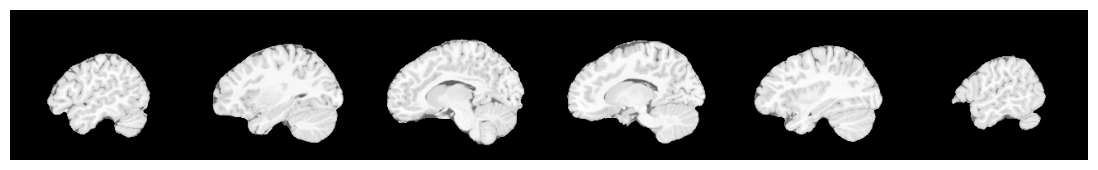

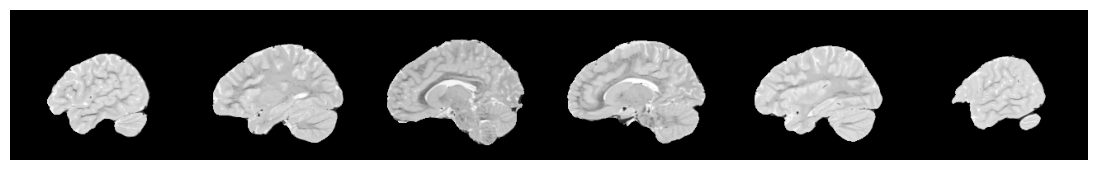

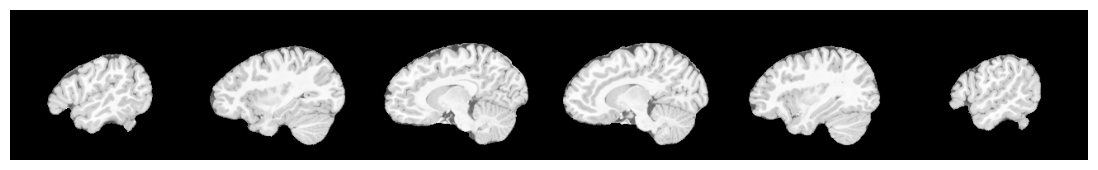

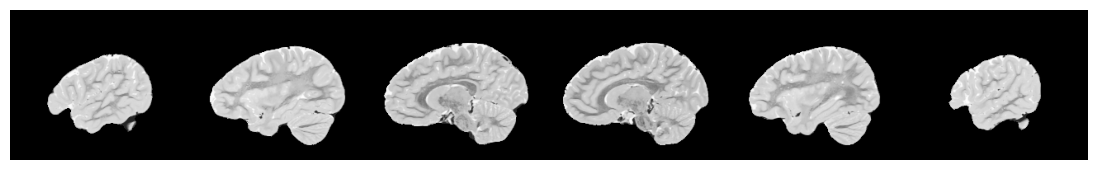

In [8]:
for sid in subids[:2]:
    preproc_path = f"{processed_data_path_docker}/conte/{sid}.nii.gz"
    t1_img, t2_img = ants.image_read(preproc_path).split_channels()
    t1_img.plot(nslices=6)
    t2_img.plot(nslices=6)

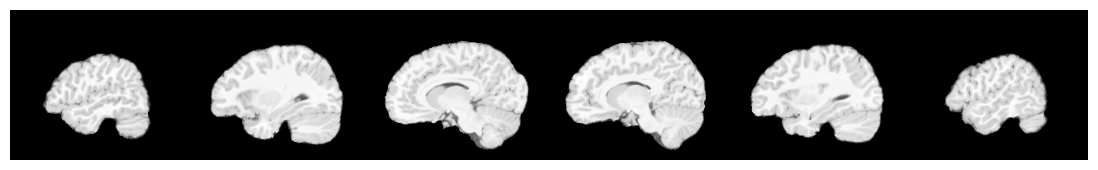

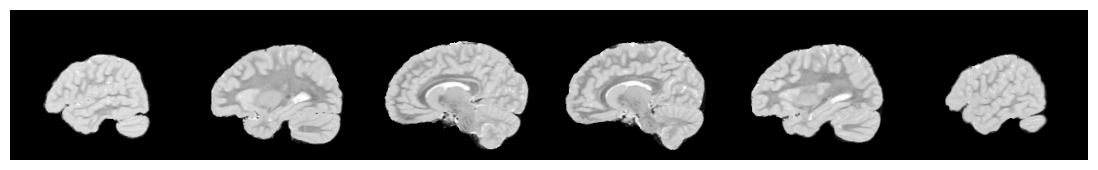

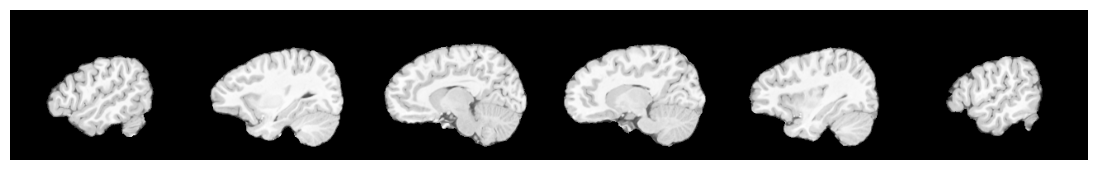

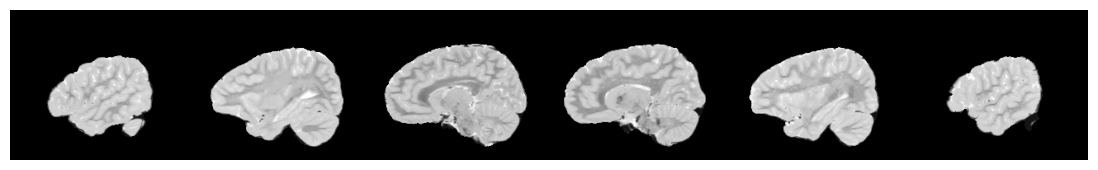

In [10]:
for sid in subids[-2:]:
    preproc_path = f"{processed_data_path_docker}/conte-trio/{sid}.nii.gz"
    t1_img, t2_img = ants.image_read(preproc_path).split_channels()
    t1_img.plot(nslices=6)
    t2_img.plot(nslices=6)

### Have not done any QC yet!

In [11]:
conte_qc_passing_keys = set(subids)
print(f"QC Passing: {len(conte_qc_passing_keys)}")
# ebds_passing_keys = set(pd.read_csv("conte_keys.txt", header=None)[0])
# ebds_passing_keys = ebds_passing_keys.intersection(conte_qc_passing_keys)
# print(f"Remaining: {len(ebds_passing_keys)} - Dropped {len(ebds_qc_passing_keys) - len(ebds_passing_keys)} using BRIEF/BASC")

QC Passing: 444


In [12]:
conte_qc_passing_keys = pd.Series(list(conte_qc_passing_keys))
conte_qc_passing_keys.to_csv('../split-keys/conte_keys.txt', header=None, index=None)